In [4]:
%pip install -r "../requirements.txt" --q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
file_path = '../data/raw/archivo_1.csv' 
df = pd.read_csv(file_path)

# 1. Análisis Exploratorio de Datos

In [7]:
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,wilaya,gender,age,body_surf,weight,married,nbrs_child,blood,HBP,diabete,...,HIV,Ag_HBS,gly,TCA,TP,Fib,Ferr,LDH,FE,CLASS
0,Tlemcen,0,74.0,1.76,68.0,1.0,8.0,NaN,0.0,0.0,...,NaN,NaN,1.09,NaN,NaN,NaN,NaN,201.0,69.0,6
1,Tlemcen,1,67.0,1.63,59.0,1.0,6.0,O+,0.0,0.0,...,0.0,0.0,0.96,34.1,77.3,2.71,NaN,327.0,65.0,6
2,Tlemcen,1,88.0,1.47,50.0,1.0,9.0,O+,1.0,0.0,...,0.0,0.0,0.73,NaN,NaN,NaN,NaN,349.5,NaN,6
3,SidiBelabes,1,63.0,NaN,65.0,NaN,NaN,O+,1.0,1.0,...,0.0,0.0,1.07,33.2,100.0,4.20,346.9,441.6,60.0,6
4,Tlemcen,0,53.0,NaN,NaN,1.0,5.0,A+,0.0,0.0,...,0.0,0.0,1.18,13.0,100.0,5.84,NaN,209.0,74.0,4


In [8]:
df = df.rename(columns={
    'gender': 'sex',
    'roll_RBC': 'rolleaux',
    'clair_creat': 'creat_clearance',
    'CLASS': 'class',
    'Urea': 'urea'
})

In [9]:
df = df[['age', 'ost_les', 'BJp', 'prot_rate', 'sex', 'anemia', 'creat', 'CBC_WBC', 'CBC_RBC', 'CBC_Hgb', 'CBC_Hct', 'CBC_MCV', 'VS', 'rolleaux', '24h_prot', 'Ig', 'chain', 'asth&bone', 'alb', 'Ca', 'K', 'urea', 'creat_clearance', 'LDH', 'FE', 'class']]

df.head()

,age,ost_les,BJp,prot_rate,sex,anemia,creat,CBC_WBC,CBC_RBC,CBC_Hgb,...,chain,asth&bone,alb,Ca,K,urea,creat_clearance,LDH,FE,class
0,74.0,1.0,NaN,63.80,0,NaN,18.80,7.10,3.06,9.0,...,NaN,1.0,36.5,97.10,NaN,0.56,34.41,201.0,69.0,6
1,67.0,1.0,NaN,104.00,1,NaN,8.31,6.01,3.84,10.2,...,NaN,1.0,32.8,89.70,4.12,0.24,72.86,327.0,65.0,6
2,88.0,1.0,NaN,96.28,1,NaN,11.25,4.32,2.38,8.7,...,NaN,NaN,30.9,95.00,NaN,0.77,43.59,349.5,NaN,6
3,63.0,NaN,NaN,68.00,1,0.0,8.90,10.87,3.53,11.0,...,NaN,0.0,37.7,89.30,4.58,1.01,68.97,441.6,60.0,6
4,53.0,0.0,NaN,91.00,0,0.0,7.93,6.75,4.10,11.6,...,K,0.0,33.5,94.09,4.06,0.18,102.36,209.0,74.0,4


In [10]:
print("Información general del dataset:")
df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              203 non-null    float64
 1   ost_les          175 non-null    float64
 2   BJp              49 non-null     float64
 3   prot_rate        194 non-null    float64
 4   sex              203 non-null    int64  
 5   anemia           114 non-null    float64
 6   creat            200 non-null    float64
 7   CBC_WBC          201 non-null    float64
 8   CBC_RBC          200 non-null    float64
 9   CBC_Hgb          202 non-null    float64
 10  CBC_Hct          200 non-null    float64
 11  CBC_MCV          199 non-null    float64
 12  VS               191 non-null    float64
 13  rolleaux         43 non-null     float64
 14  24h_prot         68 non-null     float64
 15  Ig               111 non-null    object 
 16  chain            113 non-null

Existen variables categoricas pero solo 2 no codificadas en el dataset original (Ig y chain)

In [11]:
print("Descripción estadística de las variables numéricas:")
df.describe()

Descripción estadística de las variables numéricas:


,age,ost_les,BJp,prot_rate,sex,anemia,creat,CBC_WBC,CBC_RBC,CBC_Hgb,...,24h_prot,asth&bone,alb,Ca,K,urea,creat_clearance,LDH,FE,class
count,203.000000,175.000000,49.000000,194.000000,203.000000,114.000000,200.000000,201.000000,200.000000,202.000000,...,68.000000,183.000000,198.000000,194.000000,130.000000,199.000000,200.000000,138.000000,134.000000,203.000000
mean,65.059113,0.857143,0.714286,87.973608,0.477833,0.377193,17.878850,7.260299,3.416350,10.200347,...,0.647059,0.912568,33.499899,91.226546,4.208615,0.715427,57.409550,299.835797,65.542761,5.231527
std,11.890859,0.350931,0.456435,22.711605,0.500743,0.486824,20.331515,3.569840,0.847946,2.445647,...,0.481438,0.283242,6.952371,23.629440,0.755707,1.514499,33.330147,175.117643,6.964596,1.890725
min,38.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.790000,1.700000,1.100000,3.800000,...,0.000000,0.000000,13.520000,2.100000,2.500000,0.120000,0.490000,68.000000,44.430000,0.000000
25%,57.000000,1.000000,0.000000,71.250000,0.000000,0.000000,9.000000,5.050000,2.887500,8.700000,...,0.000000,1.000000,29.302500,84.550000,3.757500,0.300000,35.122500,192.500000,61.000000,4.000000
50%,64.000000,1.000000,1.000000,82.500000,0.000000,0.000000,12.015000,6.500000,3.330000,10.000000,...,1.000000,1.000000,34.195000,90.000000,4.170000,0.410000,54.905000,245.000000,65.640000,6.000000
75%,73.000000,1.000000,1.000000,102.000000,1.000000,1.000000,16.225000,8.930000,3.962500,11.800000,...,1.000000,1.000000,38.900000,97.875000,4.507500,0.670000,80.332500,366.690000,70.000000,6.000000
max,98.000000,1.000000,1.000000,168.000000,1.000000,1.000000,178.000000,23.500000,5.880000,17.100000,...,1.000000,1.000000,49.300000,249.280000,9.790000,13.900000,260.430000,1435.000000,88.000000,8.000000


Estimemos la equivalencia de 0 y 1 para los sexos (Sujeto a sesgo): La evidencia apunta a que el MM es mas frecuente en hombres que en mujeres, por lo que haremos la suma del numero de elementos 0 y 1 para asignarle el sexo masculino al conjunto con la suma mayor

Fuentes:
[Elsabah H, El Omri H, Habas E, Taha RY, ElKourashy SA, Ibrahim F, Nashwan AJ, Kassem N, Ojha L, Singh R, Ghasoub R, El Omri A. Real world evidence of epidemiological trends, clinical presentation, and prognostic outcomes of multiple myeloma (2007-2021). Front Med (Lausanne). 2024 Feb 20;11:1338552. doi: 10.3389/fmed.2024.1338552. PMID: 38444413; PMCID: PMC10912627.](https://pubmed.ncbi.nlm.nih.gov/38444413/)

In [12]:
df['sex'].value_counts()

0    106
1     97
Name: sex, dtype: int64

En este caso asumiremos 0 para el sexo masculino y 1 para el femenino

In [13]:
df['class'] = df['class'] + 1
df['class'].value_counts()

7    108
8     37
3     22
5     19
1      6
2      5
4      3
9      2
6      1
Name: class, dtype: int64

![My Image](my_image.png)

7 = IIIA
 
8 = IIIB
 
3 = IA
 
5 = IIA
 
1 = MGUS
 
2 = ASYM
 
4 = PLASMO
 
9 = IB
 
6 = IIB 

Proximamente agregaremos la clase 0

### Definición de columnas categóricas y numéricas

In [14]:
categorical_columns = ['ost_les', 'BJp', 'class', 'sex', 'anemia', 'rolleaux', '24h_prot', 'Ig', 'chain', 'asth&bone']
numeric_columns = ['age', 'prot_rate', 'creat', 'CBC_WBC', 'CBC_RBC', 'CBC_Hgb', 'CBC_Hct', 'CBC_MCV', 'VS', 'alb', 'Ca', 'K', 'urea', 'creat_clearance', 'LDH', 'FE']

### Distribución de las variables categóricas

In [15]:
print("Distribución de las variables categóricas:")
for col in categorical_columns:
    print(f"Distribución de {col}:")
    print(df[col].value_counts())

Distribución de las variables categóricas:
Distribución de ost_les:
1.0    150
0.0     25
Name: ost_les, dtype: int64
Distribución de BJp:
1.0    35
0.0    14
Name: BJp, dtype: int64
Distribución de class:
7    108
8     37
3     22
5     19
1      6
2      5
4      3
9      2
6      1
Name: class, dtype: int64
Distribución de sex:
0    106
1     97
Name: sex, dtype: int64
Distribución de anemia:
0.0    71
1.0    43
Name: anemia, dtype: int64
Distribución de rolleaux:
0.0    30
1.0    13
Name: rolleaux, dtype: int64
Distribución de 24h_prot:
1.0    44
0.0    24
Name: 24h_prot, dtype: int64
Distribución de Ig:
IgG    72
IgA    36
IgM     2
IgD     1
Name: Ig, dtype: int64
Distribución de chain:
K    77
L    36
Name: chain, dtype: int64
Distribución de asth&bone:
1.0    167
0.0     16
Name: asth&bone, dtype: int64


### Visualización de la distribución de algunas variables numéricas

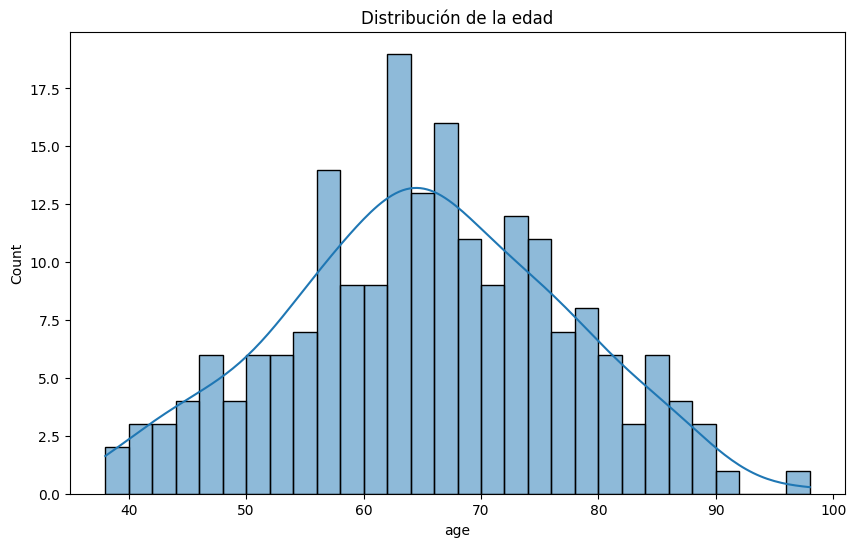

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribución de la edad')
plt.show()

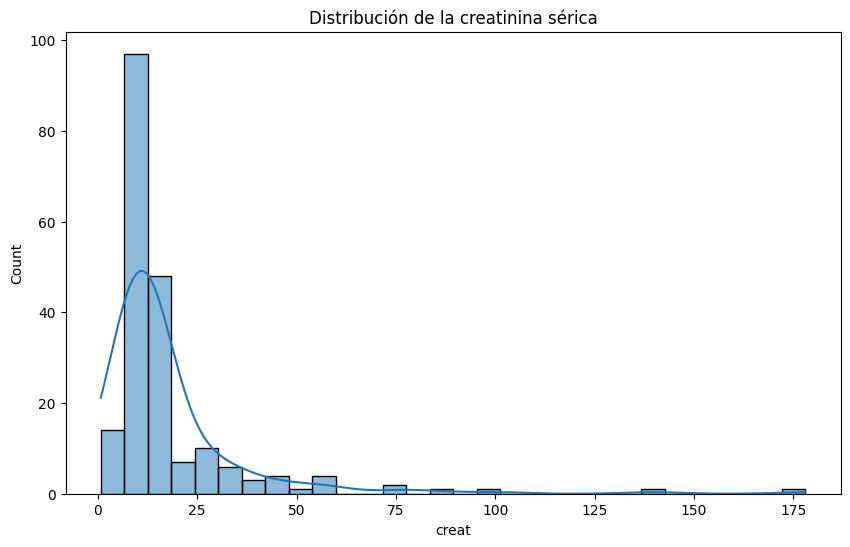

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['creat'], kde=True, bins=30)
plt.title('Distribución de la creatinina sérica')
plt.show()

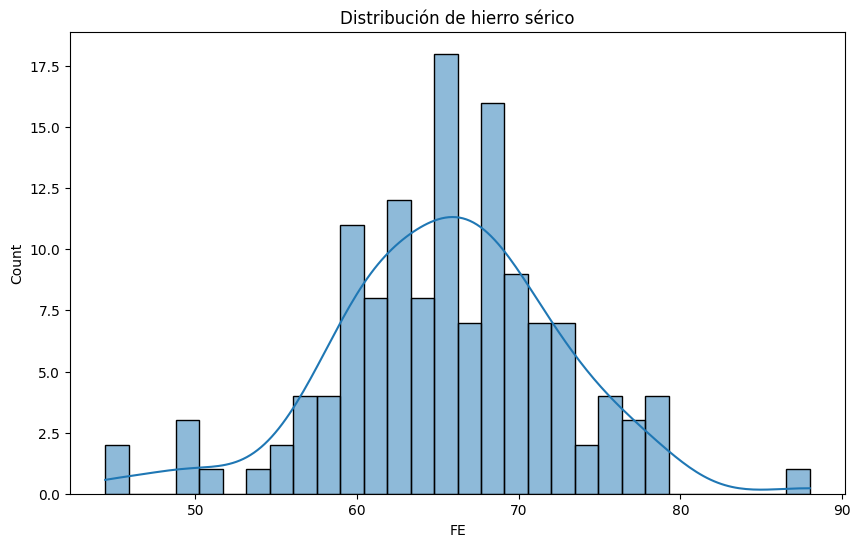

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FE'], kde=True, bins=30)
plt.title('Distribución de hierro sérico')
plt.show()

# 2. Tratamiento de Datos Faltantes
### Identificar los datos faltantes

In [19]:
print("Número de valores nulos por columna:")
df.isnull().sum()

Número de valores nulos por columna:


age                  0
ost_les             28
BJp                154
prot_rate            9
sex                  0
anemia              89
creat                3
CBC_WBC              2
CBC_RBC              3
CBC_Hgb              1
CBC_Hct              3
CBC_MCV              4
VS                  12
rolleaux           160
24h_prot           135
Ig                  92
chain               90
asth&bone           20
alb                  5
Ca                   9
K                   73
urea                 4
creat_clearance      3
LDH                 65
FE                  69
class                0
dtype: int64

## Detección de valores nulos implícitos
1. Revisión de columnas categóricas en busca de cadenas vacías

In [20]:

print("Chequeo de valores implícitos que podrían representar nulos:")


for col in categorical_columns:
    if (df[col] == '').sum() > 0:
        print(f"La columna '{col}' tiene {(df[col] == '').sum()} valores vacíos.")
    else:
        print(f"La columna '{col}' no tiene strings vacíos")

Chequeo de valores implícitos que podrían representar nulos:
La columna 'ost_les' no tiene strings vacíos
La columna 'BJp' no tiene strings vacíos
La columna 'class' no tiene strings vacíos
La columna 'sex' no tiene strings vacíos
La columna 'anemia' no tiene strings vacíos
La columna 'rolleaux' no tiene strings vacíos
La columna '24h_prot' no tiene strings vacíos
La columna 'Ig' no tiene strings vacíos
La columna 'chain' no tiene strings vacíos
La columna 'asth&bone' no tiene strings vacíos


2. Revisión de columnas numéricas para detectar ceros en donde podrían ser implícitamente nulos

In [21]:
for col in numeric_columns:
    if (df[col] == 0).sum() > 0:
        print(f"La columna '{col}' tiene {(df[col] == 0).sum()} valores de cero, verifica si estos son apropiados.")
    else:
        print(f"La columna '{col}' no tiene valores de 0")

La columna 'age' no tiene valores de 0
La columna 'prot_rate' no tiene valores de 0
La columna 'creat' no tiene valores de 0
La columna 'CBC_WBC' no tiene valores de 0
La columna 'CBC_RBC' no tiene valores de 0
La columna 'CBC_Hgb' no tiene valores de 0
La columna 'CBC_Hct' no tiene valores de 0
La columna 'CBC_MCV' no tiene valores de 0
La columna 'VS' no tiene valores de 0
La columna 'alb' no tiene valores de 0
La columna 'Ca' no tiene valores de 0
La columna 'K' no tiene valores de 0
La columna 'urea' no tiene valores de 0
La columna 'creat_clearance' no tiene valores de 0
La columna 'LDH' no tiene valores de 0
La columna 'FE' no tiene valores de 0


### Imputar valores faltantes para variables numéricas con la mediana

In [22]:
num_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

### Imputar valores faltantes para variables categóricas con la moda

In [23]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

### Verificar que no haya valores faltantes

In [24]:
print("Número de valores nulos después de la imputación:")
df.isnull().sum()

Número de valores nulos después de la imputación:


age                0
ost_les            0
BJp                0
prot_rate          0
sex                0
anemia             0
creat              0
CBC_WBC            0
CBC_RBC            0
CBC_Hgb            0
CBC_Hct            0
CBC_MCV            0
VS                 0
rolleaux           0
24h_prot           0
Ig                 0
chain              0
asth&bone          0
alb                0
Ca                 0
K                  0
urea               0
creat_clearance    0
LDH                0
FE                 0
class              0
dtype: int64

# 4. Generación sintética de datos

### Nuestro dataframe original solo cuenta con pacientes de diagnostico confirmado de MM en cualquiera de sus estadíos, ahora vamos a añadir de manera artificial datos de pacientes sanos cuyo valor "class" será 0

In [25]:
ranges = {
    'age': (18, 65),  # Edad entre 18 y 65 años
    'prot_rate': (6.0, 8.0),  # Tasa de proteínas en g/dL
    'creat': (0.6, 1.2),  # Creatinina en mg/dL
    'CBC_WBC': (4.0, 11.0),  # Glóbulos blancos en miles/µL
    'CBC_RBC': (4.5, 5.9),  # Glóbulos rojos en millones/µL
    'CBC_Hgb': (13.5, 17.5),  # Hemoglobina en g/dL
    'CBC_Hct': (40.0, 50.0),  # Hematocrito en %
    'CBC_MCV': (80.0, 100.0),  # Volumen corpuscular medio en fL
    'VS': (0, 20),  # Velocidad de sedimentación en mm/h
    'alb': (3.5, 5.0),  # Albúmina en g/dL
    'Ca': (8.5, 10.5),  # Calcio en mg/dL
    'K': (3.5, 5.0),  # Potasio en mEq/L
    'urea': (7, 20),  # Urea en mg/dL
    'creat_clearance': (90, 120),  # Clearance de creatinina en mL/min
    'LDH': (125, 220), # LDH en U/L
    'FE': (50, 150)   # Hierro en mcg/dL
}

categorical_vars = {
    'ost_les': 0,
    'BJp': 0,
    'class': 0,
    'sex': ['0', '1'],
    'anemia': 0,
    'rolleaux': 0,
    '24h_prot': 0,
    'Ig': ["IgG", "IgM"],
    'chain': "None",
    'asth&bone': 0,
    'class': 0
}

In [26]:
new_data = []

# Generar las filas aleatorias
for _ in range(150):
    row = {}
    
    # Generar valores numéricos aleatorios dentro de los rangos definidos
    for key, (low, high) in ranges.items():
        row[key] = np.random.uniform(low, high)
    
    # Generar valores categóricos aleatorios
    for key in categorical_vars:
        if isinstance(categorical_vars[key], list):
            row[key] = np.random.choice(categorical_vars[key])
        else:
            row[key] = categorical_vars[key]  
    
    new_data.append(row)

# Crear el DataFrame final con los datos generados
print("Nuevos datos generados")
print(new_data)
df_normal_patients = pd.DataFrame(new_data)

df = pd.concat([df, df_normal_patients])

Nuevos datos generados
[{'age': 23.126334334721918, 'prot_rate': 6.083513820856812, 'creat': 0.9788374149149782, 'CBC_WBC': 7.876834575346413, 'CBC_RBC': 4.9157667963256575, 'CBC_Hgb': 13.803468306172968, 'CBC_Hct': 44.42518388401742, 'CBC_MCV': 92.81165914558744, 'VS': 9.717260109325084, 'alb': 3.939343272927478, 'Ca': 9.332383400222348, 'K': 4.433224602916868, 'urea': 14.009882031186041, 'creat_clearance': 98.81394709131312, 'LDH': 196.7574890006651, 'FE': 147.1395767610481, 'ost_les': 0, 'BJp': 0, 'class': 0, 'sex': '0', 'anemia': 0, 'rolleaux': 0, '24h_prot': 0, 'Ig': 'IgG', 'chain': 'None', 'asth&bone': 0}, {'age': 20.164296691592117, 'prot_rate': 6.160715209804948, 'creat': 0.8610023240198479, 'CBC_WBC': 5.161597563380131, 'CBC_RBC': 5.191331730766046, 'CBC_Hgb': 16.239838933667606, 'CBC_Hct': 45.82180678123176, 'CBC_MCV': 85.5710861360458, 'VS': 15.107139755594032, 'alb': 3.9486048958563353, 'Ca': 9.705540930033537, 'K': 4.448500767892071, 'urea': 16.07788481022475, 'creat_clear

In [27]:
df["class"].value_counts()

0    150
7    108
8     37
3     22
5     19
1      6
2      5
4      3
9      2
6      1
Name: class, dtype: int64

Haremos shuffle del dataset para mejor desempeño del modelo

In [28]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,age,ost_les,BJp,prot_rate,sex,anemia,creat,CBC_WBC,CBC_RBC,CBC_Hgb,...,chain,asth&bone,alb,Ca,K,urea,creat_clearance,LDH,FE,class
0,68.000000,0.0,1.0,108.000000,0,0.0,12.400000,10.400000,3.600000,10.100000,...,K,0.0,35.000000,80.000000,4.410000,0.680000,59.360000,222.690000,65.640000,1
1,67.000000,1.0,1.0,80.900000,0,0.0,12.000000,5.610000,2.700000,9.700000,...,K,1.0,36.450000,88.000000,4.700000,0.320000,62.200000,198.000000,62.000000,7
2,38.925899,0,0,7.350223,1,0,1.037343,4.920365,5.161280,16.829276,...,None,0,3.653884,9.684545,4.009597,8.810464,112.779052,135.705262,148.362534,0
3,62.000000,1.0,1.0,83.000000,0,0.0,6.500000,19.000000,4.490000,14.300000,...,K,0.0,37.000000,88.000000,4.170000,0.380000,104.270000,245.000000,62.000000,7
4,66.000000,1.0,1.0,71.000000,0,1.0,6.700000,5.000000,2.800000,7.600000,...,K,1.0,45.160000,55.560000,4.060000,0.250000,100.130000,290.000000,65.640000,8
5,81.000000,1.0,1.0,140.000000,0,0.0,45.100000,7.000000,3.510000,9.600000,...,L,1.0,36.120000,90.860000,4.520000,0.970000,11.370000,244.000000,55.000000,3
6,53.178874,0,0,7.338342,0,0,0.948286,5.466153,5.042291,15.847777,...,None,0,4.091947,10.262090,4.380407,19.713427,90.267323,161.607432,104.073951,0
7,77.000000,1.0,1.0,102.000000,1,0.0,23.600000,5.050000,3.330000,9.800000,...,K,1.0,33.660000,90.000000,3.550000,0.720000,19.230000,299.000000,57.000000,7
8,59.653225,0,0,6.653736,1,0,1.096830,6.693334,4.675305,14.846778,...,None,0,3.500571,8.832269,4.957834,17.303579,114.396440,180.478320,92.744927,0
9,58.862526,0,0,7.325287,0,0,0.892561,8.386330,4.859236,16.908847,...,None,0,3.527647,10.480673,3.605112,11.681115,97.364487,135.951517,63.285983,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              353 non-null    float64
 1   ost_les          353 non-null    object 
 2   BJp              353 non-null    object 
 3   prot_rate        353 non-null    float64
 4   sex              353 non-null    object 
 5   anemia           353 non-null    object 
 6   creat            353 non-null    float64
 7   CBC_WBC          353 non-null    float64
 8   CBC_RBC          353 non-null    float64
 9   CBC_Hgb          353 non-null    float64
 10  CBC_Hct          353 non-null    float64
 11  CBC_MCV          353 non-null    float64
 12  VS               353 non-null    float64
 13  rolleaux         353 non-null    object 
 14  24h_prot         353 non-null    object 
 15  Ig               353 non-null    object 
 16  chain            353 non-null    object 
 17  asth&bone       

#### Balanceo de clases

In [30]:
def class_balance(df, classes_to_augment):
    augmented_rows = []
    
    # Filter rows of the target class
    for key, value in classes_to_augment.items():
        target_class = key
        num_augmented = value
        target_rows = df[df['class'] == target_class]
    
        for _, row in target_rows.iterrows():
            for _ in range(num_augmented):
              # Create a copy of the row and modify it slightly
              augmented_row = row.copy()
              
              # Slightly modify numeric features (adding noise)
              columns = numeric_columns + categorical_columns
              for column in numeric_columns:
                augmented_row[column] = augmented_row[column] + np.random.uniform(-0.18, 0.6)
              
              augmented_rows.append(augmented_row)
    
    return pd.DataFrame(augmented_rows)

# Identify the classes to augment and how many copies to create
classes_to_augment = {1: 15, 2: 19, 3: 4, 4: 30, 5: 4, 6: 90, 8: 2, 9: 47}

# Generate augmented data
augmented_df = class_balance(df, classes_to_augment)

# Append augmented data to original DataFrame
df = pd.concat([df, augmented_df])

df.reset_index(drop=True, inplace=True)

Otro shuffle mas

In [31]:
df = df.sample(frac=1).reset_index(drop=True)

In [32]:
df["class"].value_counts()

0    150
8    111
3    110
7    108
2    100
9     96
1     96
5     95
4     93
6     91
Name: class, dtype: int64

In [33]:
df['class'].unique()

array([3, 9, 4, 2, 0, 7, 8, 1, 5, 6], dtype=object)

In [34]:
object_columns = df.columns[df.dtypes == 'object']

print("Columnas de tipo 'object':")
print(object_columns)

Columnas de tipo 'object':
Index(['ost_les', 'BJp', 'sex', 'anemia', 'rolleaux', '24h_prot', 'Ig',
       'chain', 'asth&bone', 'class'],
      dtype='object')


In [35]:
df["class"].value_counts()

0    150
8    111
3    110
7    108
2    100
9     96
1     96
5     95
4     93
6     91
Name: class, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1050 non-null   float64
 1   ost_les          1050 non-null   object 
 2   BJp              1050 non-null   object 
 3   prot_rate        1050 non-null   float64
 4   sex              1050 non-null   object 
 5   anemia           1050 non-null   object 
 6   creat            1050 non-null   float64
 7   CBC_WBC          1050 non-null   float64
 8   CBC_RBC          1050 non-null   float64
 9   CBC_Hgb          1050 non-null   float64
 10  CBC_Hct          1050 non-null   float64
 11  CBC_MCV          1050 non-null   float64
 12  VS               1050 non-null   float64
 13  rolleaux         1050 non-null   object 
 14  24h_prot         1050 non-null   object 
 15  Ig               1050 non-null   object 
 16  chain            1050 non-null   object 
 17  asth&bone     

In [37]:
columns_to_int = ['ost_les', 'BJp', 'sex', 'anemia', 'rolleaux', '24h_prot', 'asth&bone', 'class']
df[columns_to_int] = df[columns_to_int].astype('int32')

In [38]:
df.dtypes

age                float64
ost_les              int32
BJp                  int32
prot_rate          float64
sex                  int32
anemia               int32
creat              float64
CBC_WBC            float64
CBC_RBC            float64
CBC_Hgb            float64
CBC_Hct            float64
CBC_MCV            float64
VS                 float64
rolleaux             int32
24h_prot             int32
Ig                  object
chain               object
asth&bone            int32
alb                float64
Ca                 float64
K                  float64
urea               float64
creat_clearance    float64
LDH                float64
FE                 float64
class                int32
dtype: object

# 5. Codificación de Variables Categóricas

In [39]:
object_columns = ["Ig", "chain"]
label_encoder = LabelEncoder()
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head(10)

,age,ost_les,BJp,prot_rate,sex,anemia,creat,CBC_WBC,CBC_RBC,CBC_Hgb,...,chain,asth&bone,alb,Ca,K,urea,creat_clearance,LDH,FE,class
0,80.476485,1,1,69.087725,0,0,13.453999,9.999807,5.495554,15.146407,...,0,1,31.959776,87.715363,4.235806,0.591497,49.891517,245.057207,65.860643,3
1,80.546201,1,1,90.324020,1,1,6.141436,5.289665,3.254789,7.884934,...,0,1,27.397633,104.556424,2.600357,0.316821,86.363754,196.107818,75.582750,9
2,75.196991,1,1,93.199638,0,0,15.301100,4.538463,3.341767,10.243933,...,0,1,25.577621,88.835481,5.653763,0.875160,44.738206,369.264838,70.476192,4
3,75.000000,1,1,105.000000,1,1,15.000000,3.800000,3.020000,9.100000,...,0,1,31.400000,86.000000,3.700000,0.460000,33.730000,245.000000,65.640000,3
4,79.199868,1,1,82.656343,1,0,16.556055,2.270889,2.899165,9.211657,...,1,1,34.478887,107.171016,4.079613,0.569591,30.236793,245.186976,66.214179,2
5,40.296660,1,1,92.407087,1,0,28.820395,6.867979,3.036896,9.280401,...,0,1,34.616074,116.283783,4.239875,0.454151,19.961198,244.830994,58.919926,3
6,74.866840,1,1,60.268925,1,0,12.406858,6.676070,3.312330,10.201397,...,0,1,28.740826,90.246547,4.438853,0.539299,55.202547,245.254545,65.486127,3
7,80.473539,1,1,119.639058,0,0,14.082303,5.336455,3.937593,11.478669,...,0,1,25.658667,83.967347,4.163664,0.890954,46.858125,339.253462,69.894447,9
8,22.625286,0,0,6.267296,0,0,1.175190,5.444734,5.879654,16.183731,...,2,0,4.431385,9.076183,3.766627,11.587396,105.168988,134.041500,132.299825,0
9,80.179439,1,1,119.046941,0,0,14.555883,5.582707,3.496773,11.185794,...,0,1,26.135592,84.542740,3.835628,0.886786,46.801780,338.839573,69.885623,9


In [40]:
df["Ig"].unique()

array([3, 2, 0, 1])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1050 non-null   float64
 1   ost_les          1050 non-null   int32  
 2   BJp              1050 non-null   int32  
 3   prot_rate        1050 non-null   float64
 4   sex              1050 non-null   int32  
 5   anemia           1050 non-null   int32  
 6   creat            1050 non-null   float64
 7   CBC_WBC          1050 non-null   float64
 8   CBC_RBC          1050 non-null   float64
 9   CBC_Hgb          1050 non-null   float64
 10  CBC_Hct          1050 non-null   float64
 11  CBC_MCV          1050 non-null   float64
 12  VS               1050 non-null   float64
 13  rolleaux         1050 non-null   int32  
 14  24h_prot         1050 non-null   int32  
 15  Ig               1050 non-null   int32  
 16  chain            1050 non-null   int32  
 17  asth&bone     

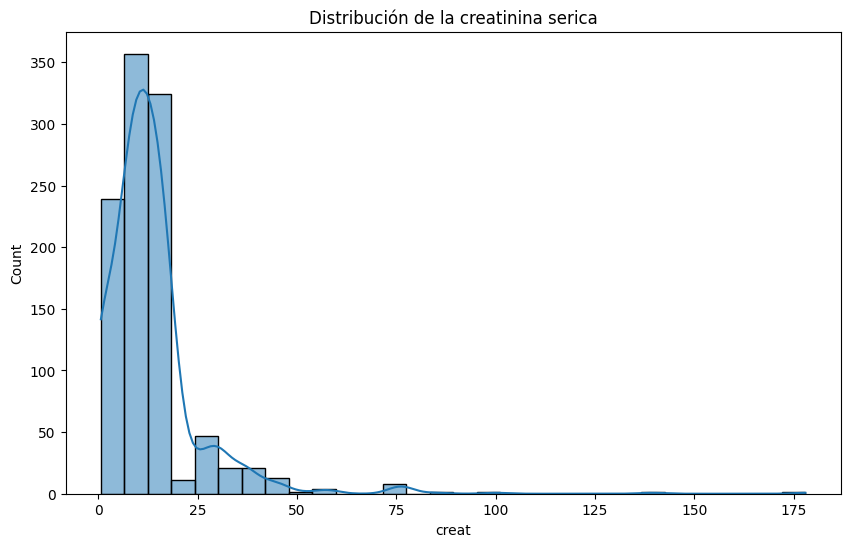

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['creat'], kde=True, bins=30)
plt.title('Distribución de la creatinina serica')
plt.show()

In [43]:
df["creat"].min()

0.6005513414600603

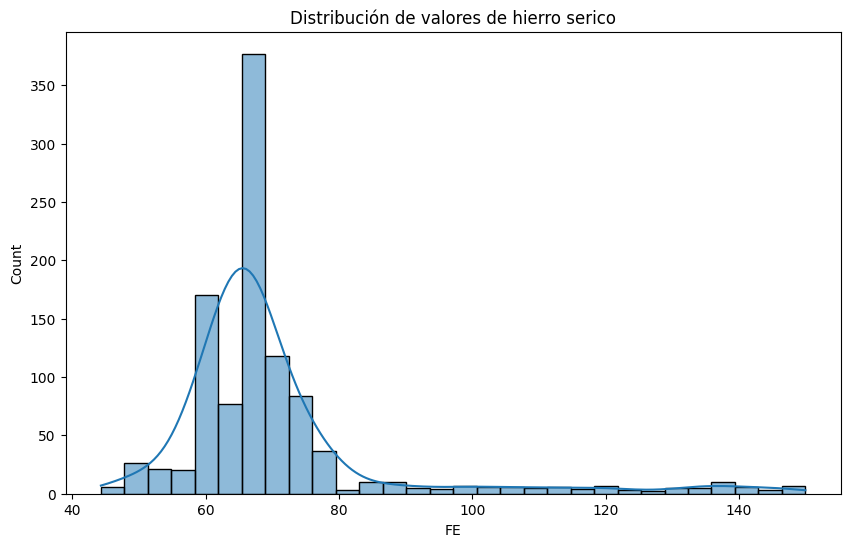

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FE'], kde=True, bins=30)
plt.title('Distribución de valores de hierro serico')
plt.show()

In [45]:
df["FE"].min()

44.27431805606134

In [47]:
# Save the dataset without normalization 
df.to_csv('../data/modified/MM_dataset.csv', index=False)

# 6. Normalización y Escalado

In [48]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [49]:
print("Primeras filas del dataset después del preprocesamiento:")
df.head()

Primeras filas del dataset después del preprocesamiento:


,age,ost_les,BJp,prot_rate,sex,anemia,creat,CBC_WBC,CBC_RBC,CBC_Hgb,...,chain,asth&bone,alb,Ca,K,urea,creat_clearance,LDH,FE,class
0,1.259288,1,1,-0.159257,0,0,0.010093,0.255932,1.775463,1.428329,...,0,1,0.319085,0.326135,-0.115424,-0.430874,-0.468019,0.017411,-0.276107,3
1,1.263989,1,1,0.470960,1,1,-0.554415,-0.623329,-0.610597,-1.265652,...,0,1,-0.047376,0.785350,-2.373347,-0.489521,0.621171,-0.372408,0.281382,9
2,0.903308,1,1,0.556298,0,0,0.152683,-0.763559,-0.517980,-0.390472,...,0,1,-0.193571,0.356678,1.842228,-0.370308,-0.621915,1.006565,-0.011440,4
3,0.890026,1,1,0.906490,1,1,0.129439,-0.901411,-0.860610,-0.814867,...,0,1,0.274120,0.279361,-0.855164,-0.458950,-0.950659,0.016955,-0.288759,3
4,1.173210,1,1,0.243410,1,0,0.249562,-1.186857,-0.989281,-0.773442,...,1,1,0.521436,0.856643,-0.331065,-0.435551,-1.054979,0.018444,-0.255834,2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1050 non-null   float64
 1   ost_les          1050 non-null   int32  
 2   BJp              1050 non-null   int32  
 3   prot_rate        1050 non-null   float64
 4   sex              1050 non-null   int32  
 5   anemia           1050 non-null   int32  
 6   creat            1050 non-null   float64
 7   CBC_WBC          1050 non-null   float64
 8   CBC_RBC          1050 non-null   float64
 9   CBC_Hgb          1050 non-null   float64
 10  CBC_Hct          1050 non-null   float64
 11  CBC_MCV          1050 non-null   float64
 12  VS               1050 non-null   float64
 13  rolleaux         1050 non-null   int32  
 14  24h_prot         1050 non-null   int32  
 15  Ig               1050 non-null   int32  
 16  chain            1050 non-null   int32  
 17  asth&bone     

In [52]:
df.to_csv('../data/processed/MM_dataset_norm.csv', index=False)